In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix

In [3]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [4]:
y_test = to_categorical(y_test)
y_train = to_categorical(y_train)

In [5]:
print(y_train[2])

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


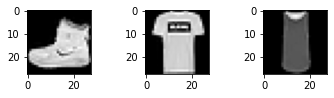

In [9]:
for i in range(3):
  plt.subplot(330 + 1 + i)
  plt.imshow((x_train[i]), cmap=plt.get_cmap('gray'))
plt.show()

In [13]:
cnn = tf.keras.models.Sequential()
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[28, 28, 1]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Dropout(0.25))
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Dropout(0.25))
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))
cnn.add(tf.keras.layers.Dropout(0.25))
cnn.add(tf.keras.layers.Dense(units=10, activation='softmax'))

cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model = cnn.fit(x_train,y_train, batch_size=32, epochs=25)

Epoch 1/25
1875/1875 [==============================] - 51s 27ms/step - loss: 1.0542 - accuracy: 0.7093
Epoch 2/25
1875/1875 [==============================] - 49s 26ms/step - loss: 0.5106 - accuracy: 0.8102
Epoch 3/25
1875/1875 [==============================] - 48s 25ms/step - loss: 0.4465 - accuracy: 0.8360
Epoch 4/25
1875/1875 [==============================] - 47s 25ms/step - loss: 0.4112 - accuracy: 0.8468
Epoch 5/25
1875/1875 [==============================] - 47s 25ms/step - loss: 0.3956 - accuracy: 0.8546
Epoch 6/25
1875/1875 [==============================] - 47s 25ms/step - loss: 0.3745 - accuracy: 0.8608
Epoch 7/25
1875/1875 [==============================] - 47s 25ms/step - loss: 0.3643 - accuracy: 0.8646
Epoch 8/25
1875/1875 [==============================] - 47s 25ms/step - loss: 0.3547 - accuracy: 0.8691
Epoch 9/25
1875/1875 [==============================] - 48s 26ms/step - loss: 0.3491 - accuracy: 0.8704
Epoch 10/25
1875/1875 [==============================] - 49s 26m

In [14]:
y_pred = cnn.predict(x_test)

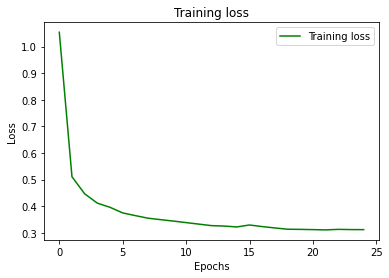

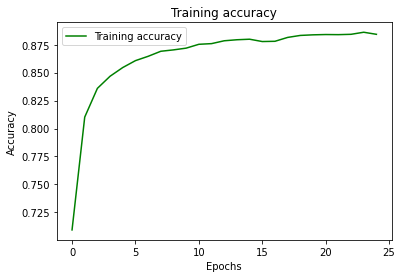

In [15]:
plt.plot(model.epoch, model.history["loss"], 'g', label='Training loss')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
plt.plot(model.epoch, model.history["accuracy"], 'g', label='Training accuracy')
plt.title('Training accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [16]:
counter = 0
correct = 0
for i in range(len(y_pred)):
  if (np.argmax(y_pred[i]) == np.argmax(y_test[i])):
    correct += 1
  counter += 1
print(correct/counter)

0.8939


In [17]:
confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))

array([[864,   0,  11,  15,   4,   1,  97,   0,   8,   0],
       [  1, 964,   1,  22,   2,   0,   7,   0,   3,   0],
       [ 17,   0, 839,  12,  60,   0,  72,   0,   0,   0],
       [ 10,   1,   6, 912,  33,   0,  36,   0,   2,   0],
       [  0,   1,  86,  35, 778,   1,  97,   0,   2,   0],
       [  0,   0,   0,   0,   0, 976,   0,  13,   0,  11],
       [130,   0,  76,  31,  63,   0, 687,   0,  12,   1],
       [  0,   0,   0,   0,   0,  10,   0, 975,   0,  15],
       [  1,   0,   3,   3,   1,   2,  10,   1, 978,   1],
       [  0,   0,   1,   0,   0,   3,   0,  30,   0, 966]])